# Instructor Do: Decision Trees

In [4]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_absolute_error, mean_squared_error , r2_score

## Loading house price Data

In [5]:
# Loading data
file_path = Path("./Resources/housing_data.csv")
df_house = pd.read_csv(file_path)
df_house['date'] = df_house['date'].str.replace('T000000',' ').astype(int)
#df_house['date']= pd.to_datetime(df_house['date'])
df_house.drop("id", axis=1, inplace=True)
df_house.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013,231300,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:

# Define features set
feature_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'yr_built' , 'zipcode', 'lat', 'long']
X  = df_house.copy()[feature_list]
X.head()




,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,lat,long
0,2,1.00,1180,5650,3,7,1955,98178,47.5112,-122.257
1,3,2.25,2570,7242,3,7,1951,98125,47.7210,-122.319
2,2,1.00,770,10000,3,6,1933,98028,47.7379,-122.233
3,4,3.00,1960,5000,5,7,1965,98136,47.5208,-122.393
4,3,2.00,1680,8080,3,8,1987,98074,47.6168,-122.045


In [7]:
# Define target vector
y = df_house["price"].values.reshape(-1, 1)
y[:5]



array([[231300],
       [538000],
       [180000],
       [604000],
       [510000]], dtype=int64)

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [10]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [11]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Random Forest Regressor Model

In [12]:
# Creating the decision tree classifier instance
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [13]:
# Fitting the model
model.fit(X_train_scaled, y_train)


c:\Users\chinr\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

## visulaize actual price vs predicted price

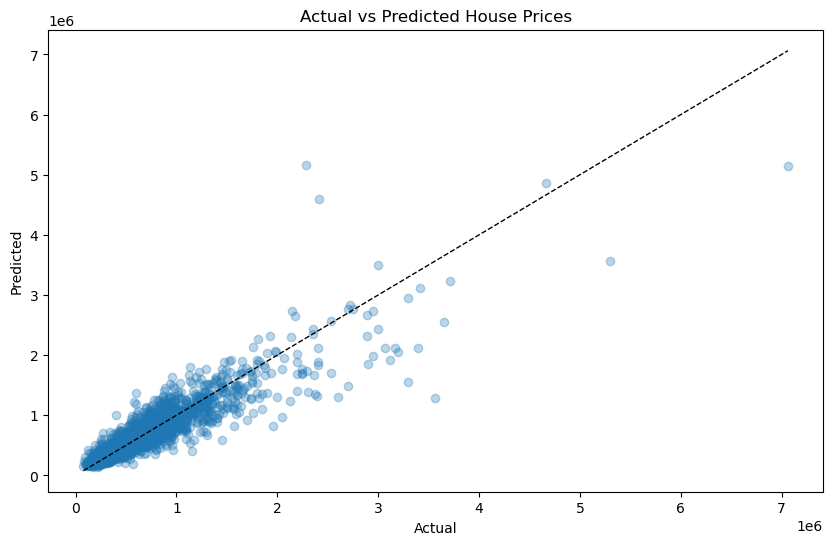

In [14]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test_scaled)

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

## Feature importances analysis

In [17]:
importances = model.feature_importances_
# We can sort the features by their importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.34430317388261505, 'sqft_living'),
 (0.27537970156790254, 'grade'),
 (0.17654161249814534, 'lat'),
 (0.08139516390156905, 'long'),
 (0.036633367112501695, 'sqft_lot'),
 (0.03650177418700237, 'yr_built'),
 (0.019562916929063798, 'zipcode'),
 (0.016447179925379283, 'bathrooms'),
 (0.007901695562693026, 'bedrooms'),
 (0.005333414433127923, 'condition')]

In [ ]:
## Evaluate the modal using MAE, MSE, RMSE and R2

In [18]:
# Displaying results
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f"The r2 is {r2}.")

Mean Absolute Error: 74173.4745423562
Mean Squared Error: 21578167159.00801
Root Mean Squared Error: 146895.08895469585
The r2 is 0.8429992836545077.
